# Analyzing the trends of COVID-19 with Python

<hr style = "height: 1px">

**PROBLEM STATEMENT**

Given data about COVID-19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends.

<hr style = "height: 1px">

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

<hr style = "height: 1px">

# Exploratory Data Analysis

EDA involves a number of different steps to help us understand the characteristics of the dataset. Following this, the data is cleaned which ensures the data is well structured and free from issues such as outliers and missing values. EDA is also used to create visualizations are such as boxplots and correlation heatmaps which help in the subsequent model building steps.<br>

These steps are carried out below:

<hr style = "height: 1px">

**LOADING AND ANALYSING THE DATASET**

<hr style = "height: 1px">

In [2]:
# Load and read the dataset
df = pd.read_csv('covid_19_clean_complete (2).csv')

In [4]:
# Print the head of the dataset
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [5]:
# Print the information summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
# Identify the datatype of the columns
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

<hr style = "height: 1px">

**DATA CLEANING**

<hr style = "height: 1px">

In [11]:
# Find the number of null values
df.isnull().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [12]:
# Find the number of missing values
df.isna().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [13]:
# Find the number of duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

In [9]:
# Renaming the columns
df.rename(columns={"Province/State":"State", "Country/Region":"Country"}, inplace=True)

In [8]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

<hr style = "height: 1px">

**DATA ANALYSIS**

<hr style = "height: 1px">

**Total number of active covid cases**


In [17]:
df["Active"]=df["Confirmed"]-df["Deaths"]-df["Recovered"]
df["Active"].sum()

396715350

**Total number of confirmed covid cases**

In [3]:
df["Confirmed"].sum()

828508482

**Total number of Deaths covid cases**

In [5]:
df["Deaths"].sum()

43384903

**Total number of countries**

In [18]:
df['Country'].nunique()

187

<hr style = "height: 1px">

**Covid-19 data has 187 countries with 396,715,350 Active cases, 828,508,482 Confirmed cases, 43,384,903 Death cases and 388,408,229 Recovered cases**

<hr style = "height: 1px">


**Total number of confirmed, recovered and active cases country**

In [10]:
world_cases = df.groupby('Country').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index(inplace=False)

world_cases.head()

Country  Confirmed  Deaths  Recovered   Active
0  Afghanistan    1936390   49098     798240  1089052
1      Albania     196702    5708     118877    72117
2      Algeria    1179755   77972     755897   345886
3      Andorra      94404    5423      69074    19907
4       Angola      22662    1078       6573    15011

**The above table shows the country with total confirmed, Deaths,Revocered,Active cases of each country.**

In [14]:
# Total number of each type of case in particular country
country_name=input('Enter the name of the country: ')
world_cases[world_cases['Country']==country_name]

Enter the name of the country: India


Country  Confirmed   Deaths  Recovered    Active
79   India   40883464  1111831   23783720  15987913

**Analysis of cases in a particular date**

In [27]:
target_date = df[df['Date']=='2020-07-27']
target_date_cases = target_date.groupby('Country').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()

target_date_cases.head()

Country  Confirmed  Deaths  Recovered  Active
0  Afghanistan      36263    1269      25198    9796
1      Albania       4880     144       2745    1991
2      Algeria      27973    1163      18837    7973
3      Andorra        907      52        803      52
4       Angola        950      41        242     667

<hr style = "height: 1px">

# Data Visualisation

<br>

In [29]:
# Analysis of  Confirmed cases in particular date
figure=px.choropleth(target_date, locations='Country',
                    locationmode='country names',color='Confirmed',
                    hover_name='Country',range_color=[1,1000],
                    color_continuous_scale='blues',
                    title='Country with Confirmed cases')
figure.show()

In [155]:
# Analysis of  Active cases in particular date
figure=px.choropleth(target_date,locations='Country',
                    locationmode='country names',color='Active',
                    hover_name='Country',range_color=[1,1000],
                    color_continuous_scale='blues',
                    title='Country with Active cases')
figure.show()

In [156]:
# Analysis of Recovered cases in particular date
figure=px.choropleth(target_date,locations='Country',
                    locationmode='country names',color='Recovered',
                    hover_name='Country',range_color=[1,1000],
                    color_continuous_scale='blues',
                    title='Country with Recovered cases')
figure.show()

In [157]:
# Analysis of Death cases in particular date
figure=px.choropleth(world,locations='Country',
                    locationmode='country names',color='Deaths',
                    hover_name='Country',range_color=[1,1000],
                    color_continuous_scale='blues',
                    title='Country with Death cases')
figure.show()

In [158]:
total_cases=df.groupby('Date')['Date', 'Confirmed'].sum().reset_index()
total_cases 

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

Text(0.5, 1.0, 'Worldwide Confirmed Cases Over Time')

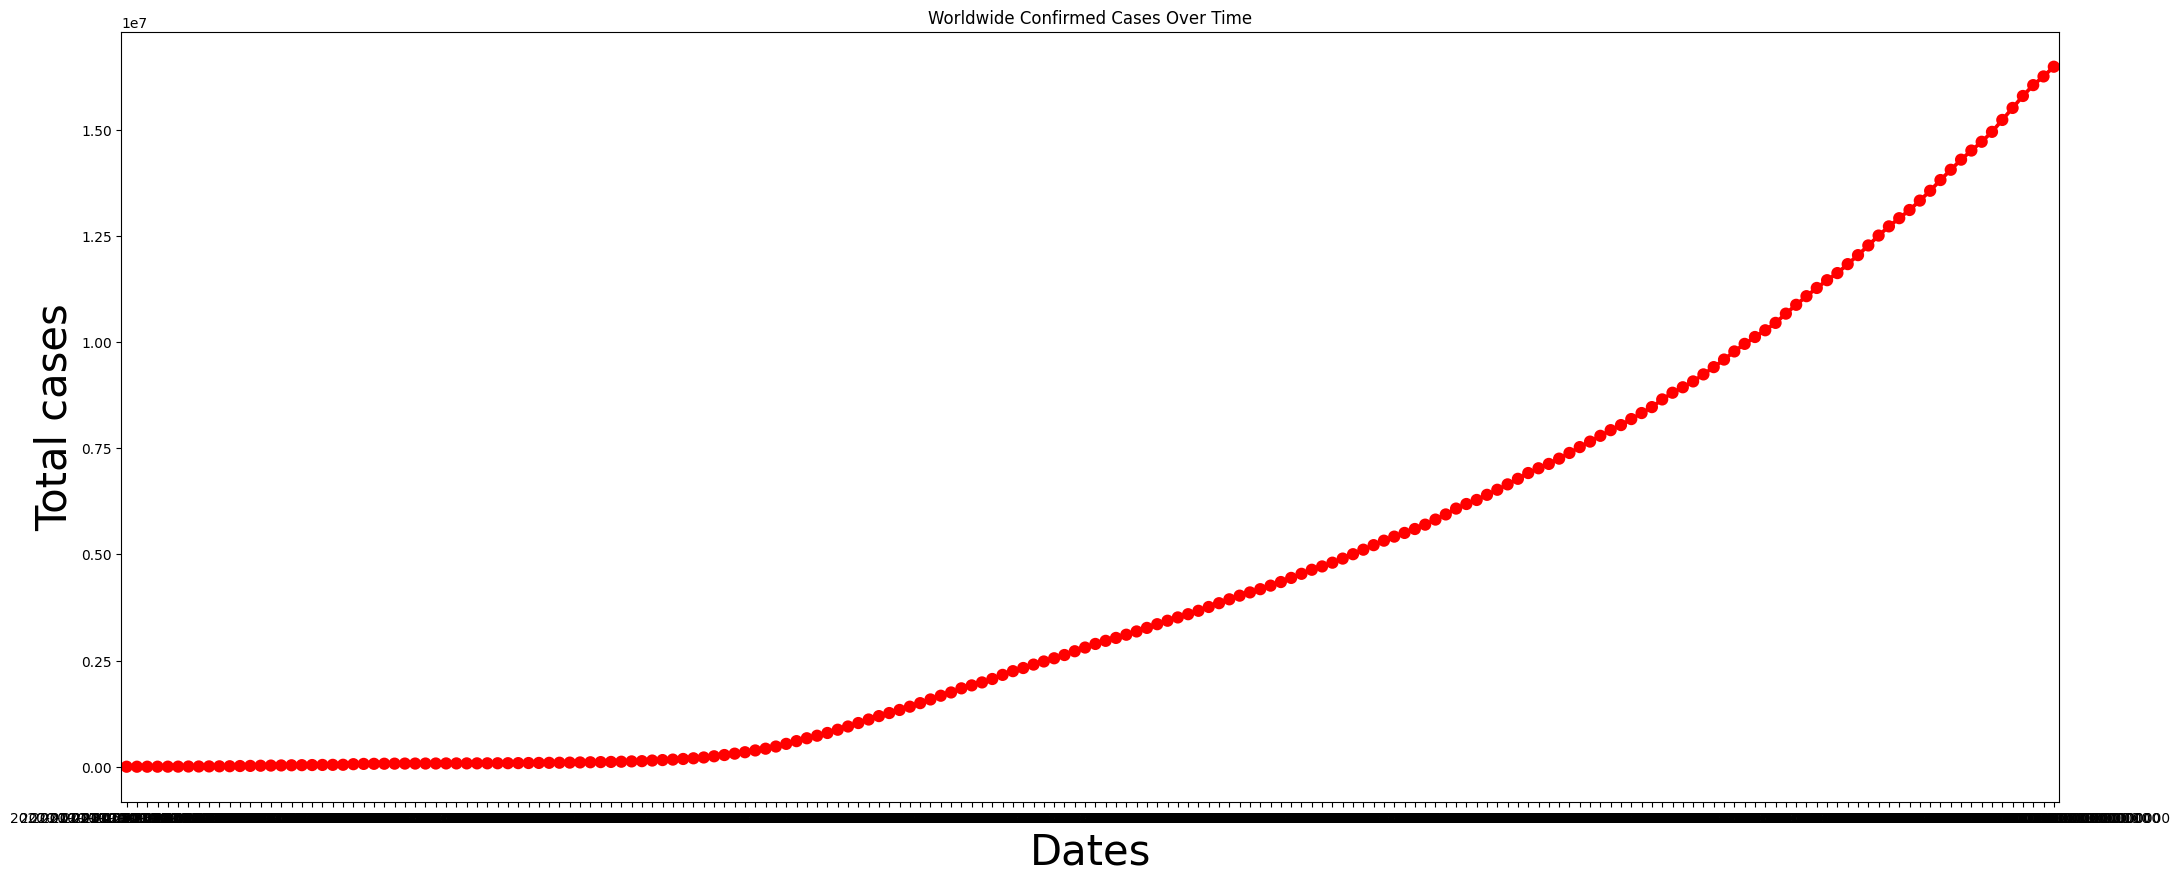

In [159]:
# Trend of how covid spread
plt.figure(figsize=(25,10)) 
CovidSpread = sns.pointplot(x=total_cases.Date,y=total_cases.Confirmed,color="red")

plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.title('Worldwide Confirmed Cases Over Time') 

# Top 20 Countries with Highest Confirmed Cases

In [160]:
top_Confirmed= df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(20).reset_index()
top_Confirmed 

Country  Confirmed
0               US  224345948
1           Brazil   89524967
2           Russia   45408411
3            India   40883464
4            Spain   27404045
5   United Kingdom   26748587
6            Italy   26745145
7           France   21210926
8          Germany   21059152
9             Iran   19339267
10            Peru   19263916
11          Turkey   17903345
12           Chile   16935654
13          Mexico   14946202
14           China   14132002
15        Pakistan   12833994
16    Saudi Arabia   12362961
17    South Africa   11168743
18          Canada    9356551
19      Bangladesh    8754729

Text(0.5, 1.0, 'Top 20 Countries with Highest Confirmed Cases')

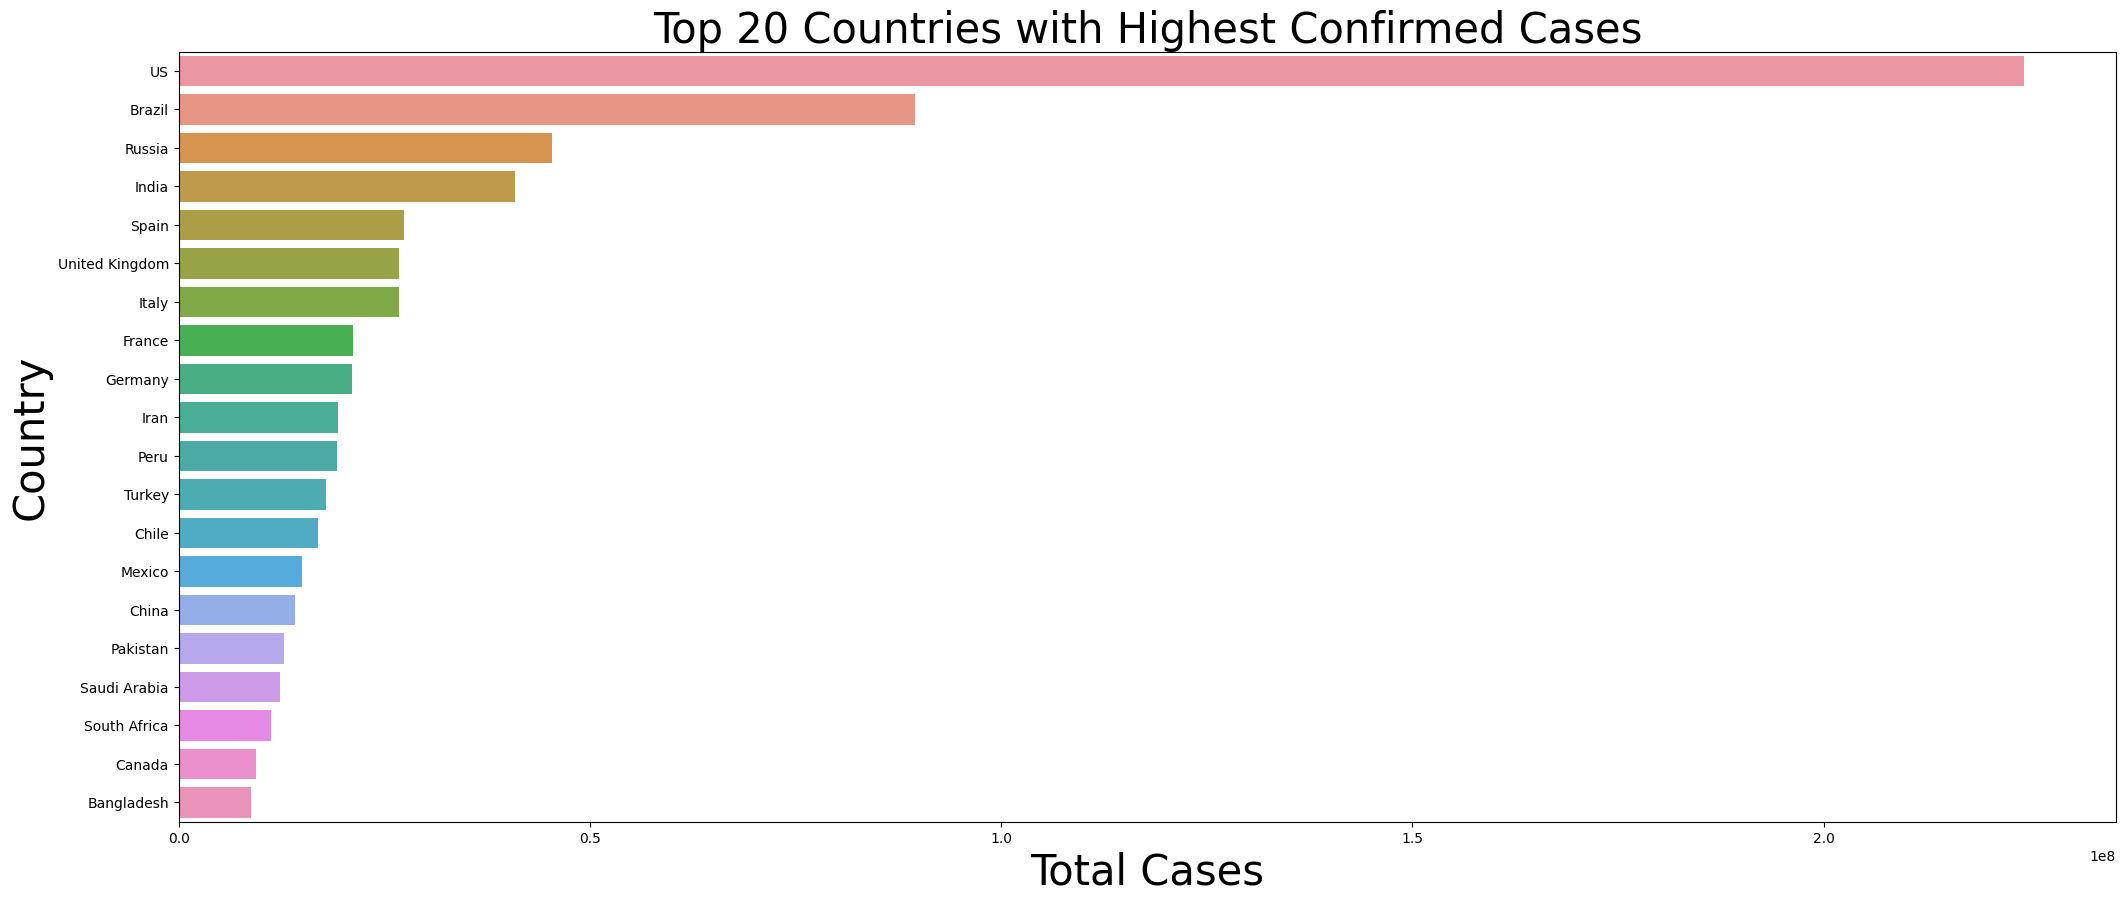

In [163]:
plt.figure(figsize=(25,10))
CovidSpread = sns.barplot(x=top_Confirmed.Confirmed,y=top_Confirmed.Country)

plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title('Top 20 Countries with Highest Confirmed Cases',fontsize=30)

# Top 20 Countries with Highest Active Cases

In [164]:
top_actives = df.groupby('Country')['Active'].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

Country     Active
0               US  156981121
1           Brazil   31094060
2   United Kingdom   22624595
3           Russia   19668578
4            India   15987913
5           France   10980287
6            Spain    9277432
7           Canada    8656985
8             Peru    7748957
9            Italy    7363518
10        Pakistan    5633262
11    South Africa    5150341
12      Bangladesh    4924394
13     Netherlands    4528235
14          Sweden    4524247
15          Turkey    4091900
16        Colombia    3832786
17    Saudi Arabia    3783704
18         Belgium    3689945
19           Chile    3320581

Text(0.5, 1.0, 'Top 20 Countries with Highest Active Cases')

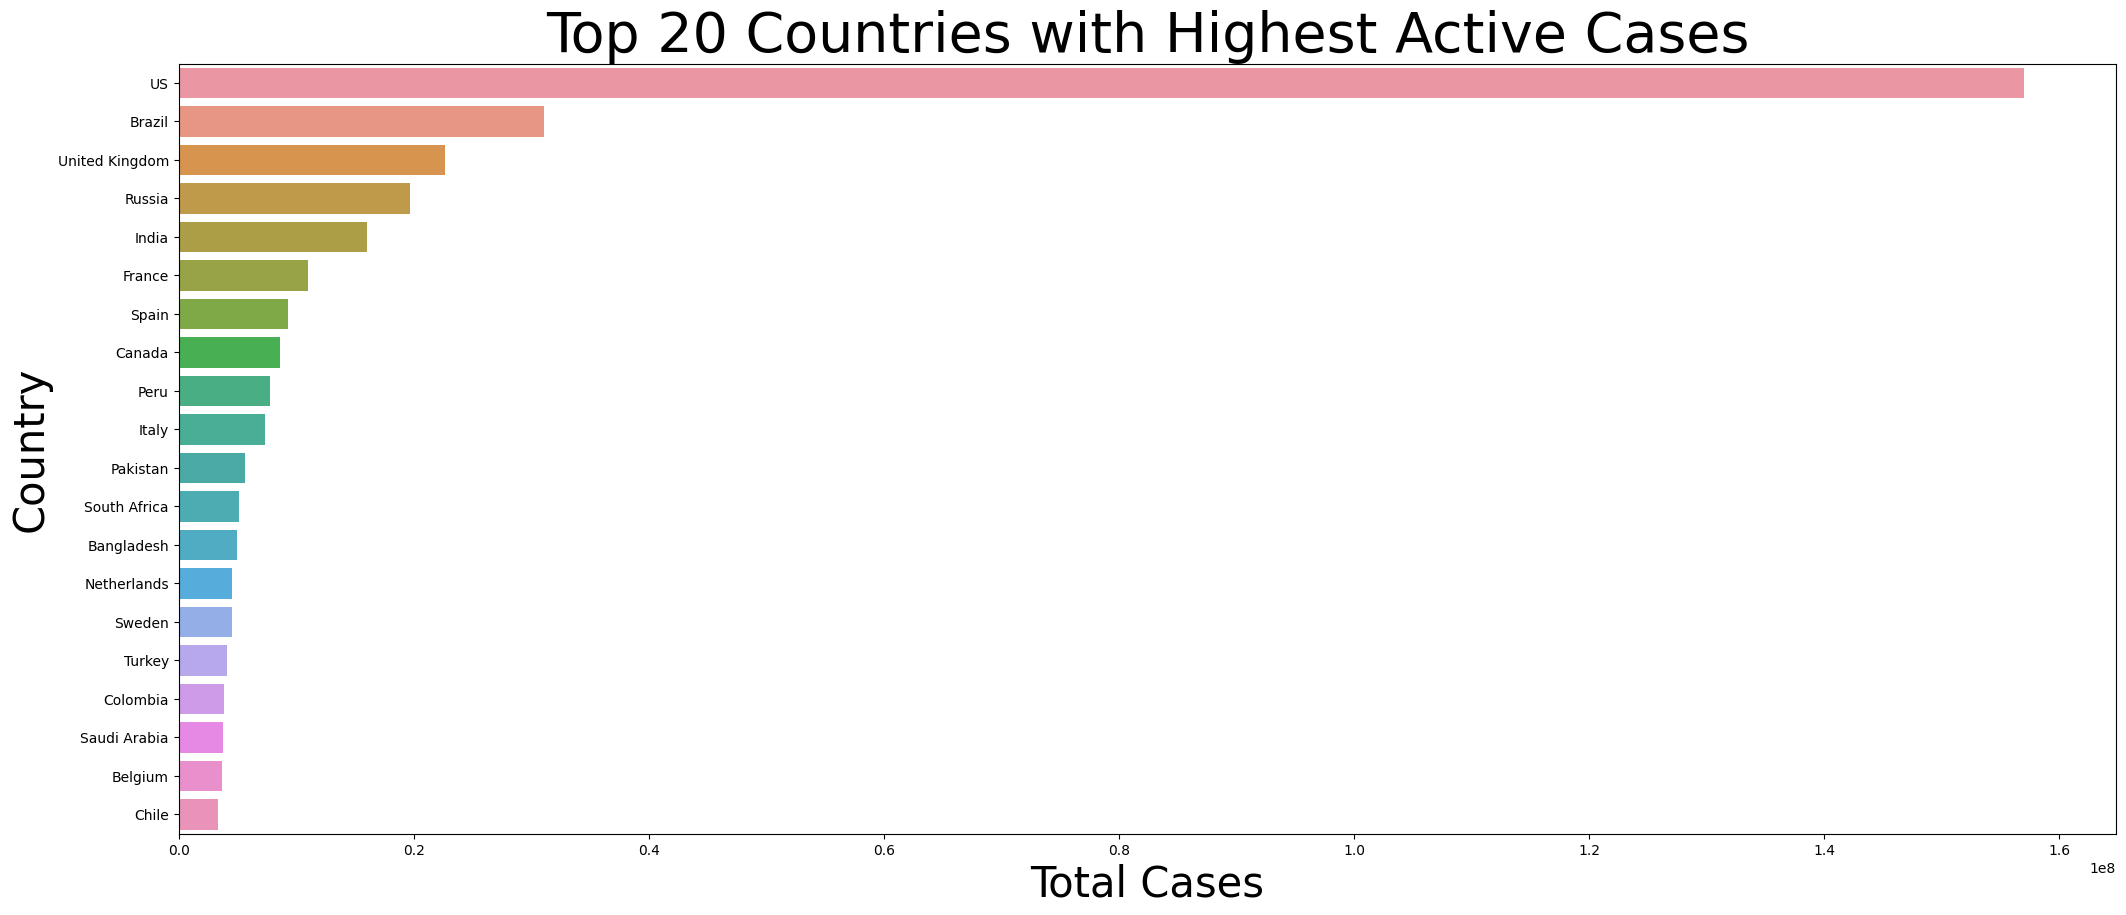

In [165]:
plt.figure(figsize=(25,10))
CovidSpread = sns.barplot(x=top_actives.Active,y=top_actives.Country)

plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title('Top 20 Countries with Highest Active Cases',fontsize=40)

# Top 20 Countries with Highest Recovery Cases

In [166]:
top_Recovered = df.groupby('Country')['Recovered'].sum().sort_values(ascending=False).head(20).reset_index()
top_Recovered

Country  Recovered
0             US   56353416
1         Brazil   54492873
2         Russia   25120448
3          India   23783720
4        Germany   17107839
5          Italy   15673910
6           Iran   15200895
7          Spain   15093583
8         Turkey   13345389
9          Chile   13292593
10         China   11466866
11        Mexico   11141225
12          Peru   10862846
13  Saudi Arabia    8474107
14        France    7182115
15      Pakistan    6936003
16  South Africa    5836423
17         Qatar    4676443
18    Bangladesh    3714702
19   Switzerland    2957883

Text(0.5, 1.0, 'Top 20 Countries with Highest Recovery Cases')

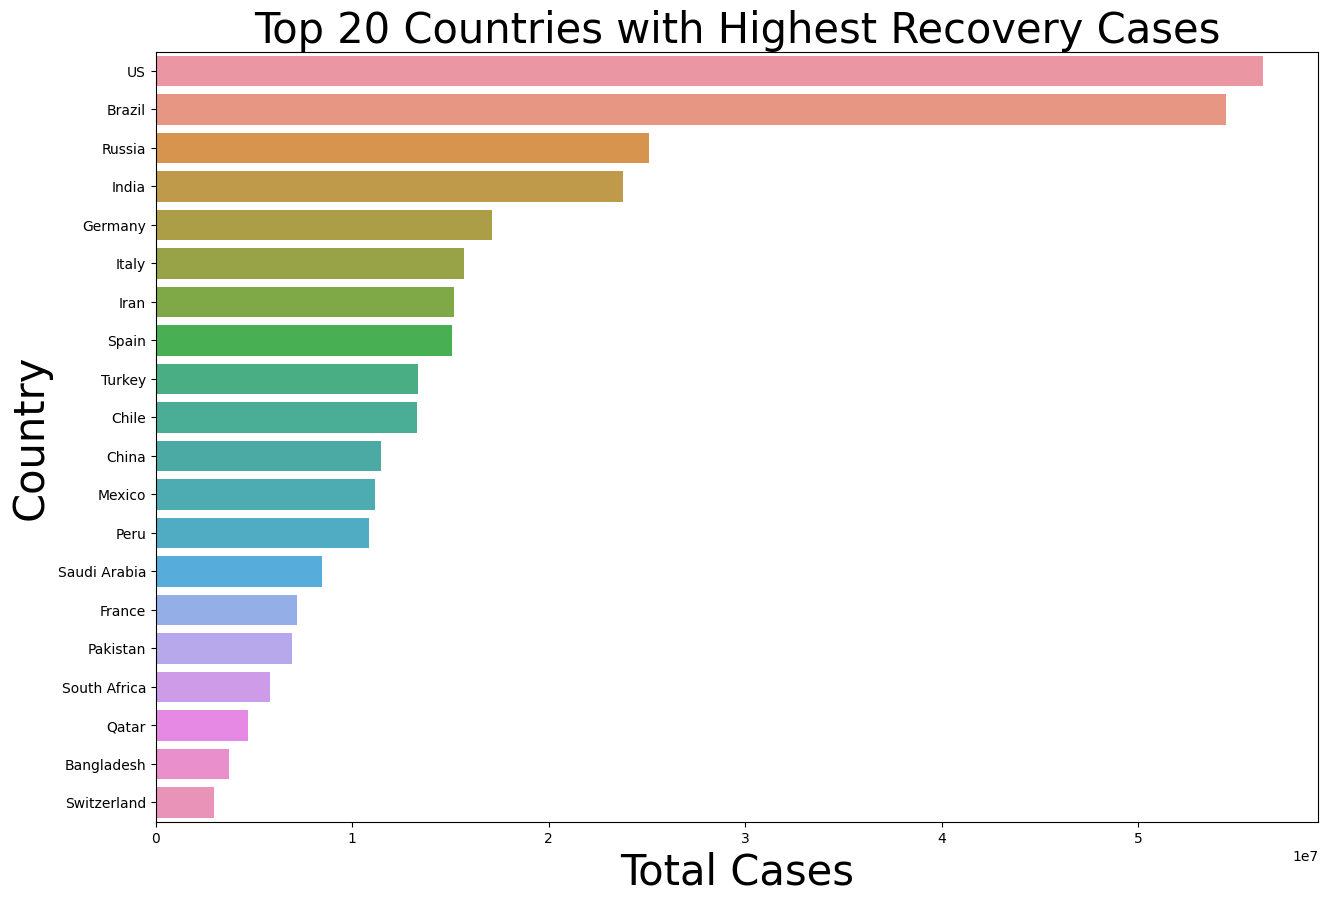

In [167]:
plt.figure(figsize=(15,10))
CovidSpread = sns.barplot(x=top_Recovered.Recovered,y=top_Recovered.Country)

plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title('Top 20 Countries with Highest Recovery Cases',fontsize=30)

# Top 20 Countries with Highest Death Cases

In [168]:
top_Deaths = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(20).reset_index()
top_Deaths

Country    Deaths
0               US  11011411
1   United Kingdom   3997775
2           Brazil   3938034
3            Italy   3707717
4           France   3048524
5            Spain   3033030
6           Mexico   1728277
7            India   1111831
8             Iran   1024136
9          Belgium    963679
10         Germany    871322
11          Canada    699566
12           China    672413
13            Peru    652113
14     Netherlands    622314
15          Russia    619385
16          Turkey    466056
17          Sweden    448913
18         Ecuador    346618
19           Chile    322480

Text(0.5, 1.0, 'Top 20 Countries with Highest Death Cases')

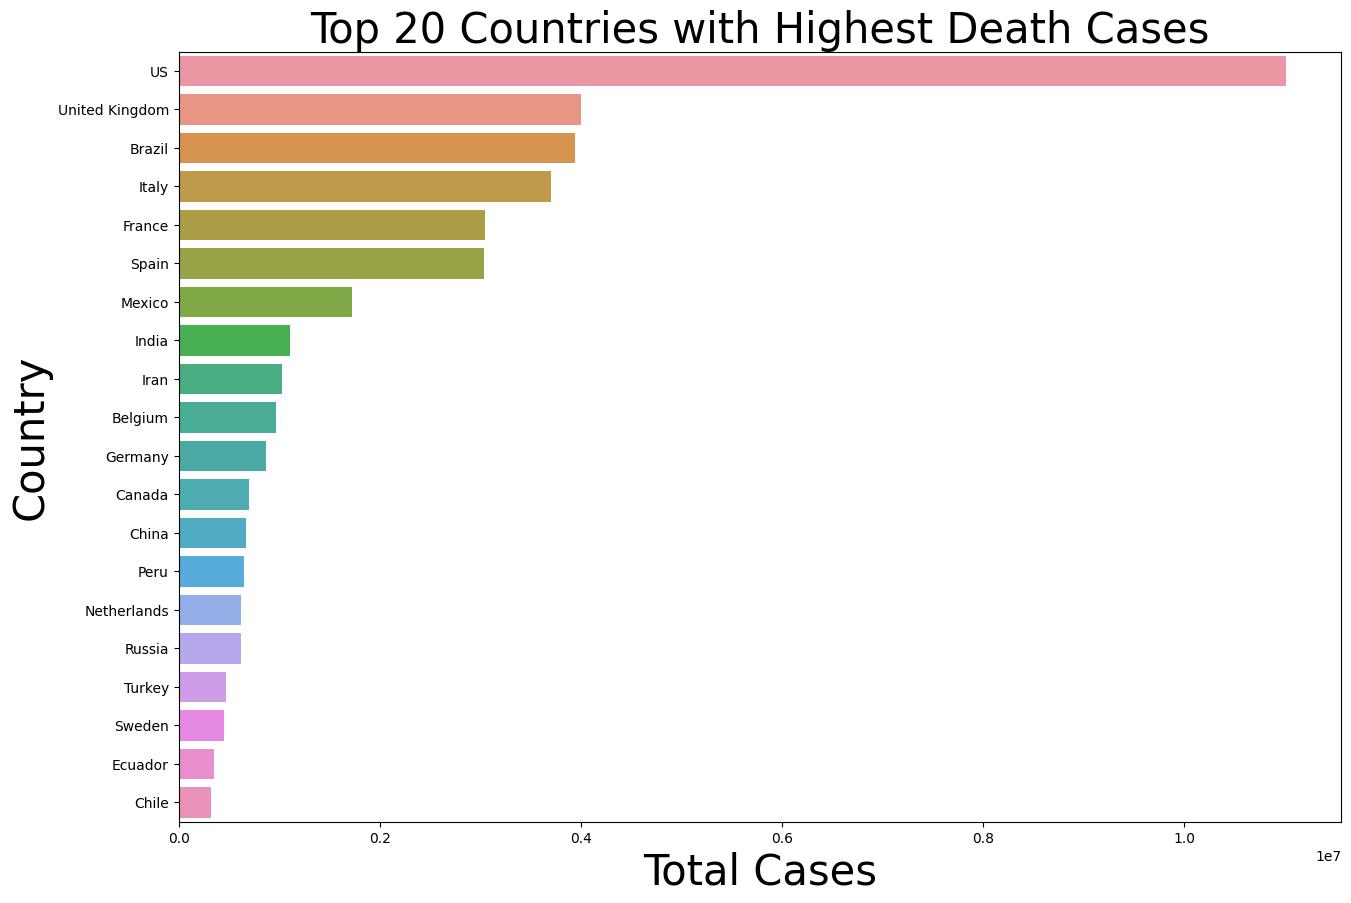

In [169]:
plt.figure(figsize=(15,10))
CovidSpread = sns.barplot(x=top_Deaths.Deaths,y=top_Deaths.Country)

plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title('Top 20 Countries with Highest Death Cases',fontsize=30)

# Top 5 countries having highest Active cases 
US<br>
BRAZIL<br>
UK<br>
RUSSIA<br>
INDIA<br>


In [310]:
US=df[df.Country=='US'] 
US= US.groupby('Date').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()
US=US.iloc[33:].reset_index().drop('index',axis=1)
US

Date  Confirmed  Deaths  Recovered   Active
0   2020-02-24         15       0          5       10
1   2020-02-25         15       0          6        9
2   2020-02-26         15       0          6        9
3   2020-02-27         16       0          6       10
4   2020-02-28         16       0          7        9
..         ...        ...     ...        ...      ...
150 2020-07-23    4038816  144430    1233269  2661117
151 2020-07-24    4112531  145560    1261624  2705347
152 2020-07-25    4178970  146465    1279414  2753091
153 2020-07-26    4233923  146935    1297863  2789125
154 2020-07-27    4290259  148011    1325804  2816444

[155 rows x 5 columns]

In [311]:
Brazil=df[df.Country=='Brazil']
Brazil=Brazil.groupby('Date').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()
Brazil=Brazil.iloc[33:].reset_index().drop('index',axis=1)
Brazil

Date  Confirmed  Deaths  Recovered  Active
0   2020-02-24          0       0          0       0
1   2020-02-25          0       0          0       0
2   2020-02-26          1       0          0       1
3   2020-02-27          1       0          0       1
4   2020-02-28          1       0          0       1
..         ...        ...     ...        ...     ...
150 2020-07-23    2287475   84082    1620313  583080
151 2020-07-24    2343366   85238    1693214  564914
152 2020-07-25    2394513   86449    1785359  522705
153 2020-07-26    2419091   87004    1812913  519174
154 2020-07-27    2442375   87618    1846641  508116

[155 rows x 5 columns]

In [312]:
UK=df[df.Country=='United Kingdom']
UK=UK.groupby('Date').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()
UK=UK.iloc[33:].reset_index().drop('index',axis=1)
UK

Date  Confirmed  Deaths  Recovered  Active
0   2020-02-24         30       0          8      22
1   2020-02-25         34       0          8      26
2   2020-02-26         37       0          8      29
3   2020-02-27         44       0          8      36
4   2020-02-28         56       0          8      48
..         ...        ...     ...        ...     ...
150 2020-07-23     298731   45639       1425  251667
151 2020-07-24     299500   45762       1425  252313
152 2020-07-25     300270   45823       1427  253020
153 2020-07-26     301020   45837       1434  253749
154 2020-07-27     301708   45844       1437  254427

[155 rows x 5 columns]

In [313]:
Russia=df[df.Country=='Russia']
Russia=Russia.groupby('Date').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()
Russia=Russia.iloc[33:].reset_index().drop('index',axis=1)
Russia

Date  Confirmed  Deaths  Recovered  Active
0   2020-02-24          2       0          2       0
1   2020-02-25          2       0          2       0
2   2020-02-26          2       0          2       0
3   2020-02-27          2       0          2       0
4   2020-02-28          2       0          2       0
..         ...        ...     ...        ...     ...
150 2020-07-23     793720   12873     579295  201552
151 2020-07-24     799499   13026     587728  198745
152 2020-07-25     805332   13172     596064  196096
153 2020-07-26     811073   13249     599172  198652
154 2020-07-27     816680   13334     602249  201097

[155 rows x 5 columns]

In [314]:
India=df[df.Country=='India']
India=India.groupby('Date').sum()[['Confirmed','Deaths','Recovered','Active']].reset_index()
India=India.iloc[33:].reset_index().drop('index',axis=1)
India 

Date  Confirmed  Deaths  Recovered  Active
0   2020-02-24          3       0          3       0
1   2020-02-25          3       0          3       0
2   2020-02-26          3       0          3       0
3   2020-02-27          3       0          3       0
4   2020-02-28          3       0          3       0
..         ...        ...     ...        ...     ...
150 2020-07-23    1288108   30601     817209  440298
151 2020-07-24    1337024   31358     849432  456234
152 2020-07-25    1385635   32060     885573  468002
153 2020-07-26    1435616   32771     917568  485277
154 2020-07-27    1480073   33408     951166  495499

[155 rows x 5 columns]

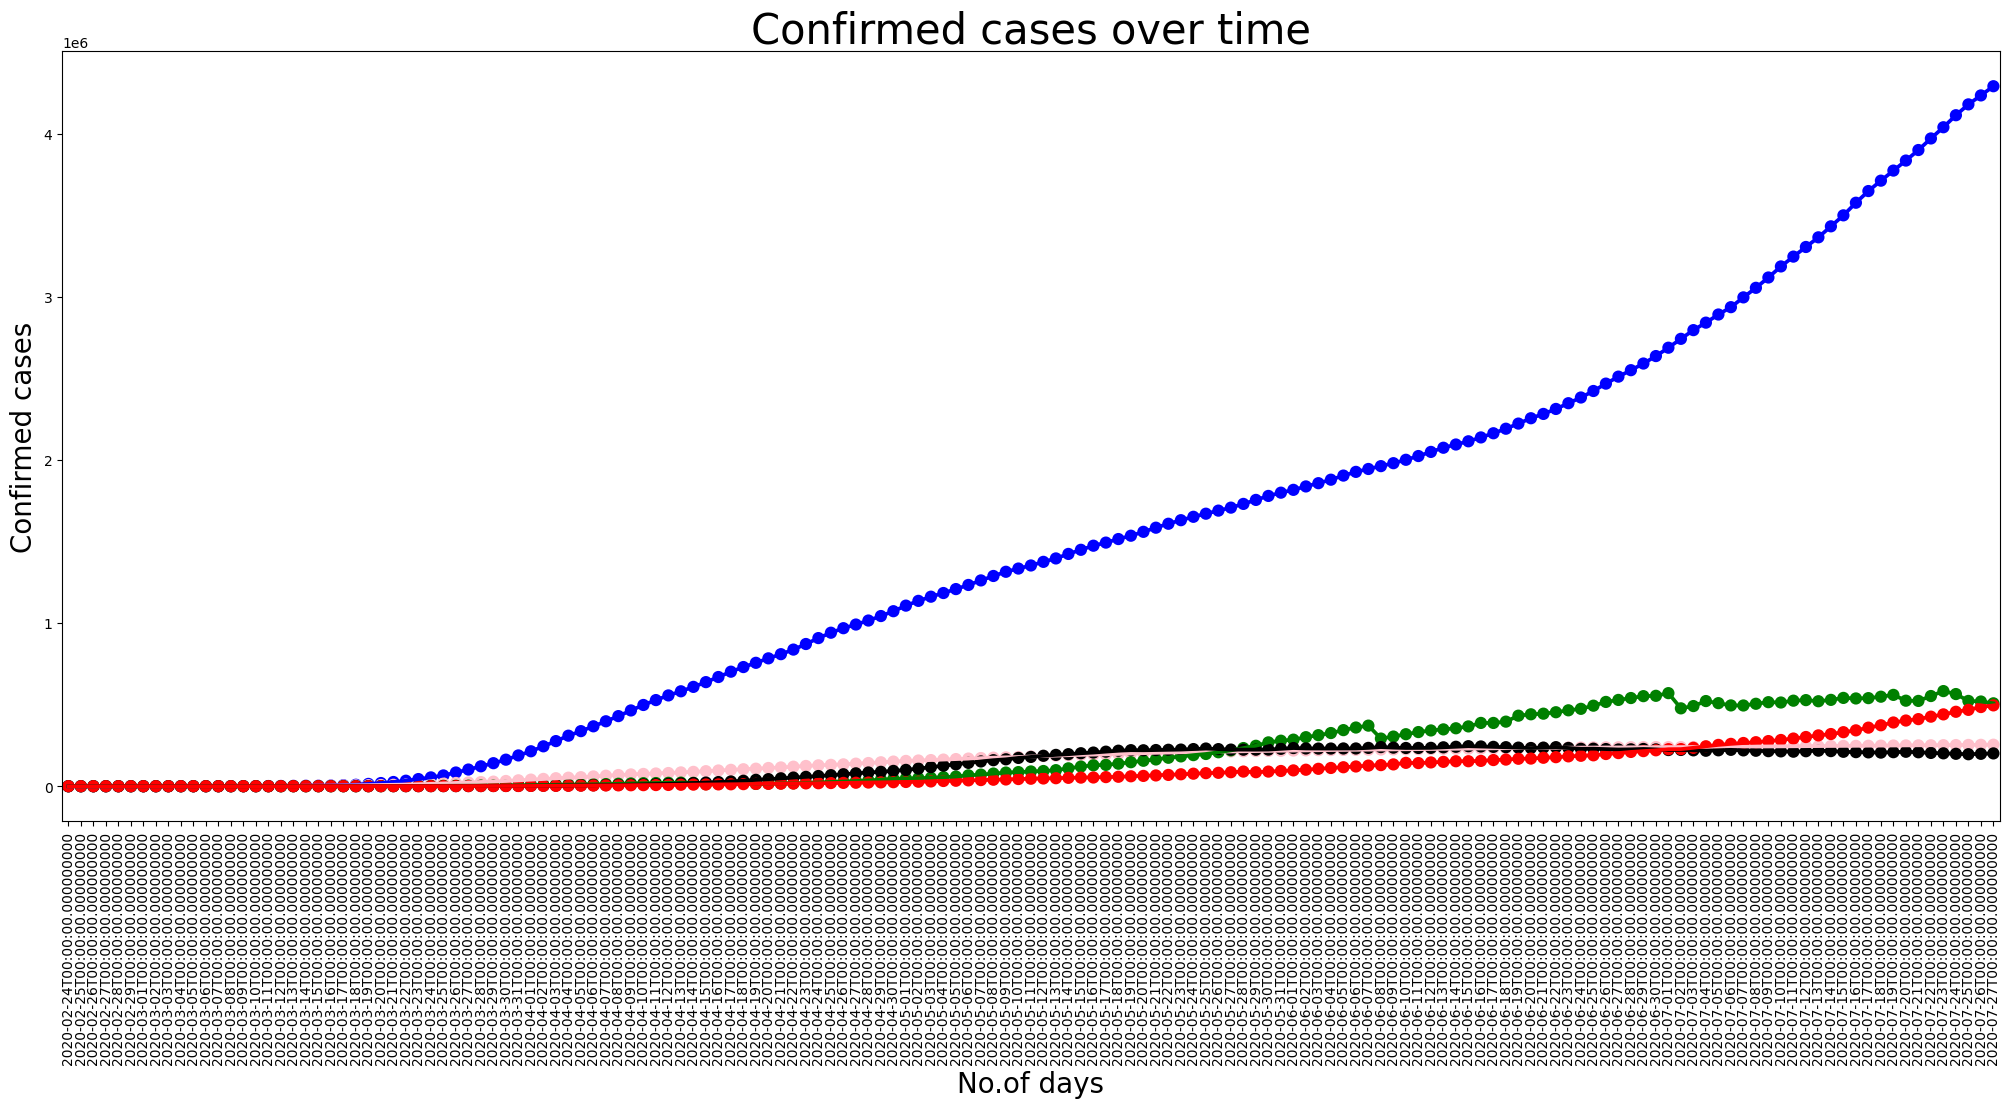

In [318]:
plt.figure(figsize=(25,10))
sns.pointplot(x=US.Date,y=US.Confirmed,color='Blue')
sns.pointplot(x=UK.Date,y=UK.Active,color='Pink')
sns.pointplot(x=Brazil.Date,y=Brazil.Active,color='Green')
sns.pointplot(x=Russia.Date,y=Russia.Active,color='Black')
sns.pointplot(x=India.Date,y=India.Active,color='Red')

plt.xlabel('No.of days', fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20) 
plt.xticks(rotation=90)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

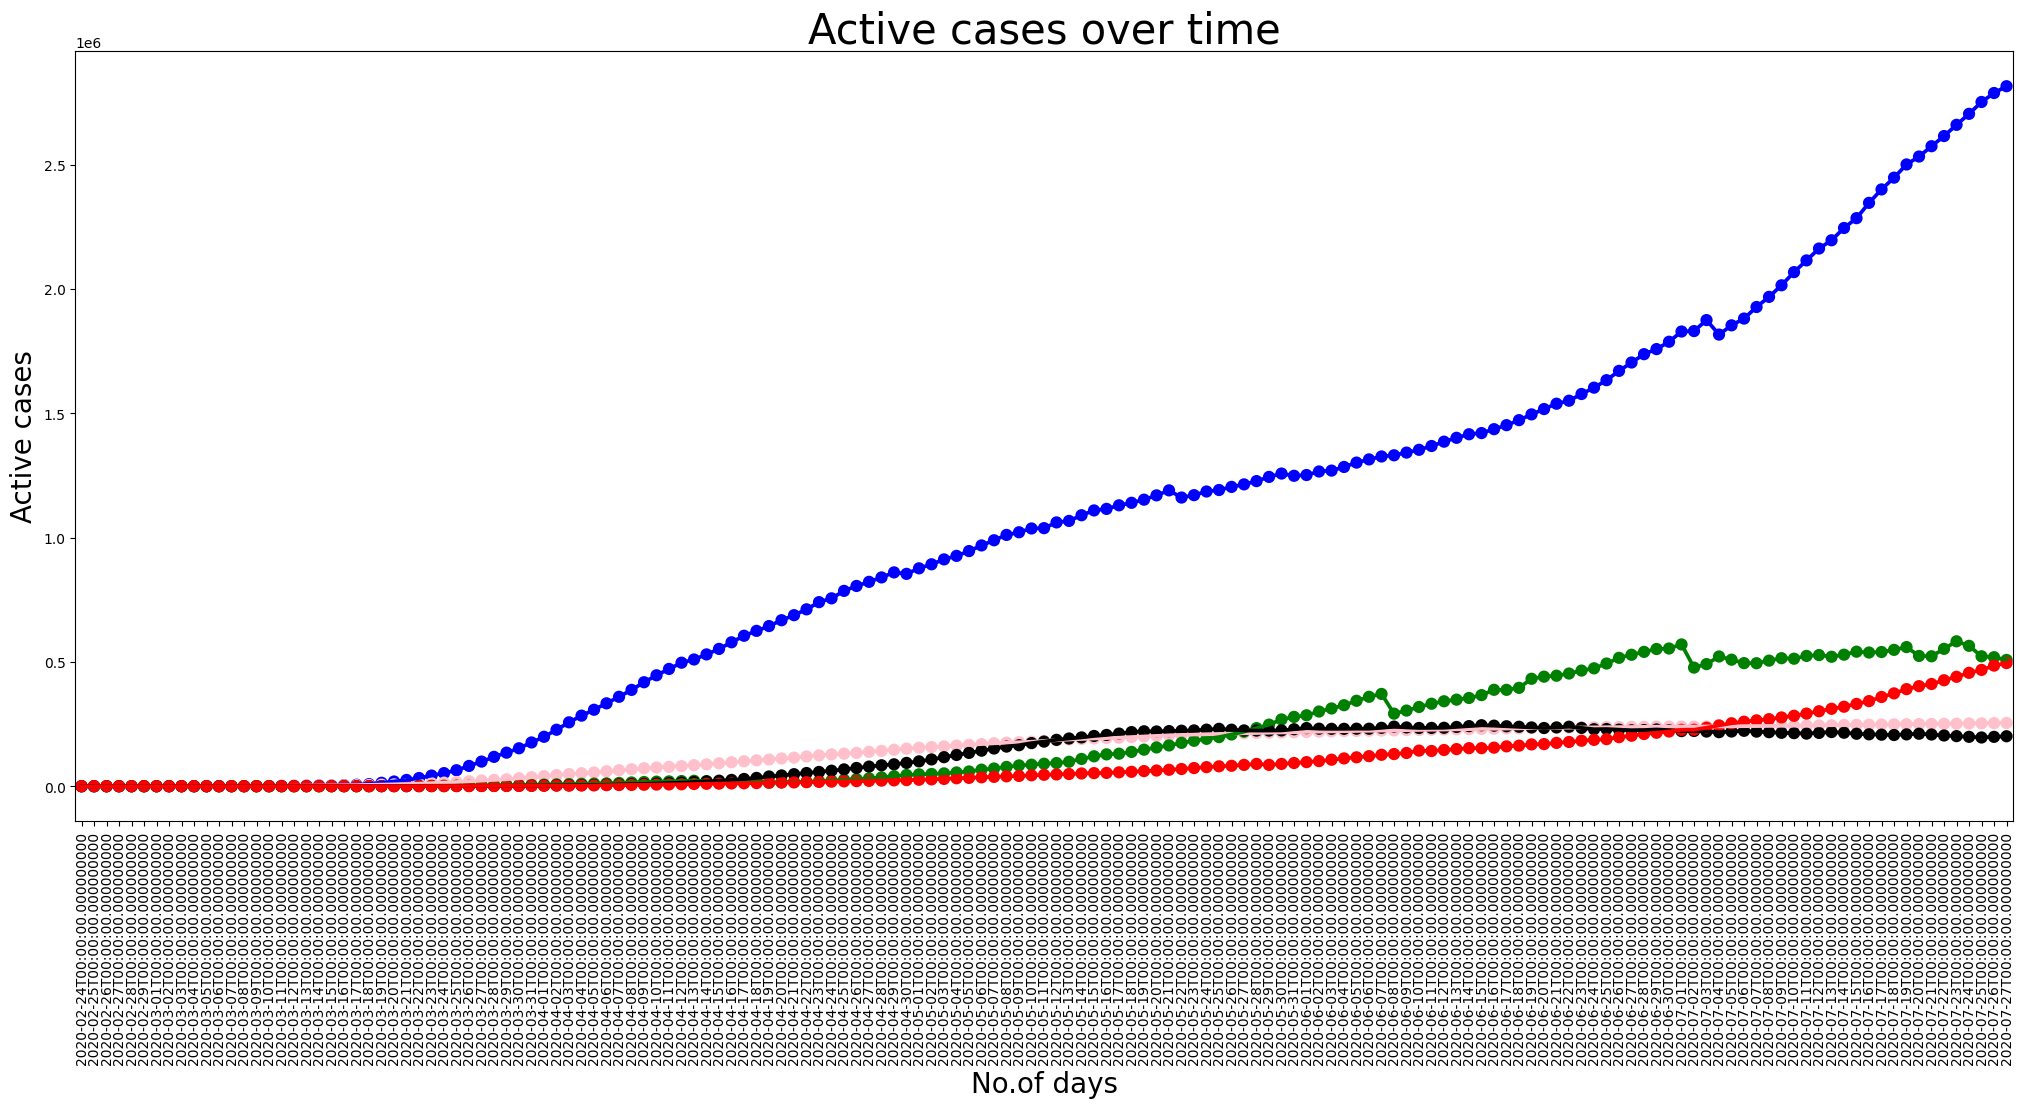

In [319]:
plt.figure(figsize=(25,10))
sns.pointplot(x=US.Date,y=US.Active,color='Blue')
sns.pointplot(x=UK.Date,y=UK.Active,color='Pink')
sns.pointplot(x=Brazil.Date,y=Brazil.Active,color='Green')
sns.pointplot(x=Russia.Date,y=Russia.Active,color='Black')
sns.pointplot(x=India.Date,y=India.Active,color='Red')

plt.xlabel('No.of days', fontsize=20)
plt.ylabel('Active cases',fontsize=20)
plt.xticks(rotation=90)
plt.title('Active cases over time',fontsize=30)
plt.show()

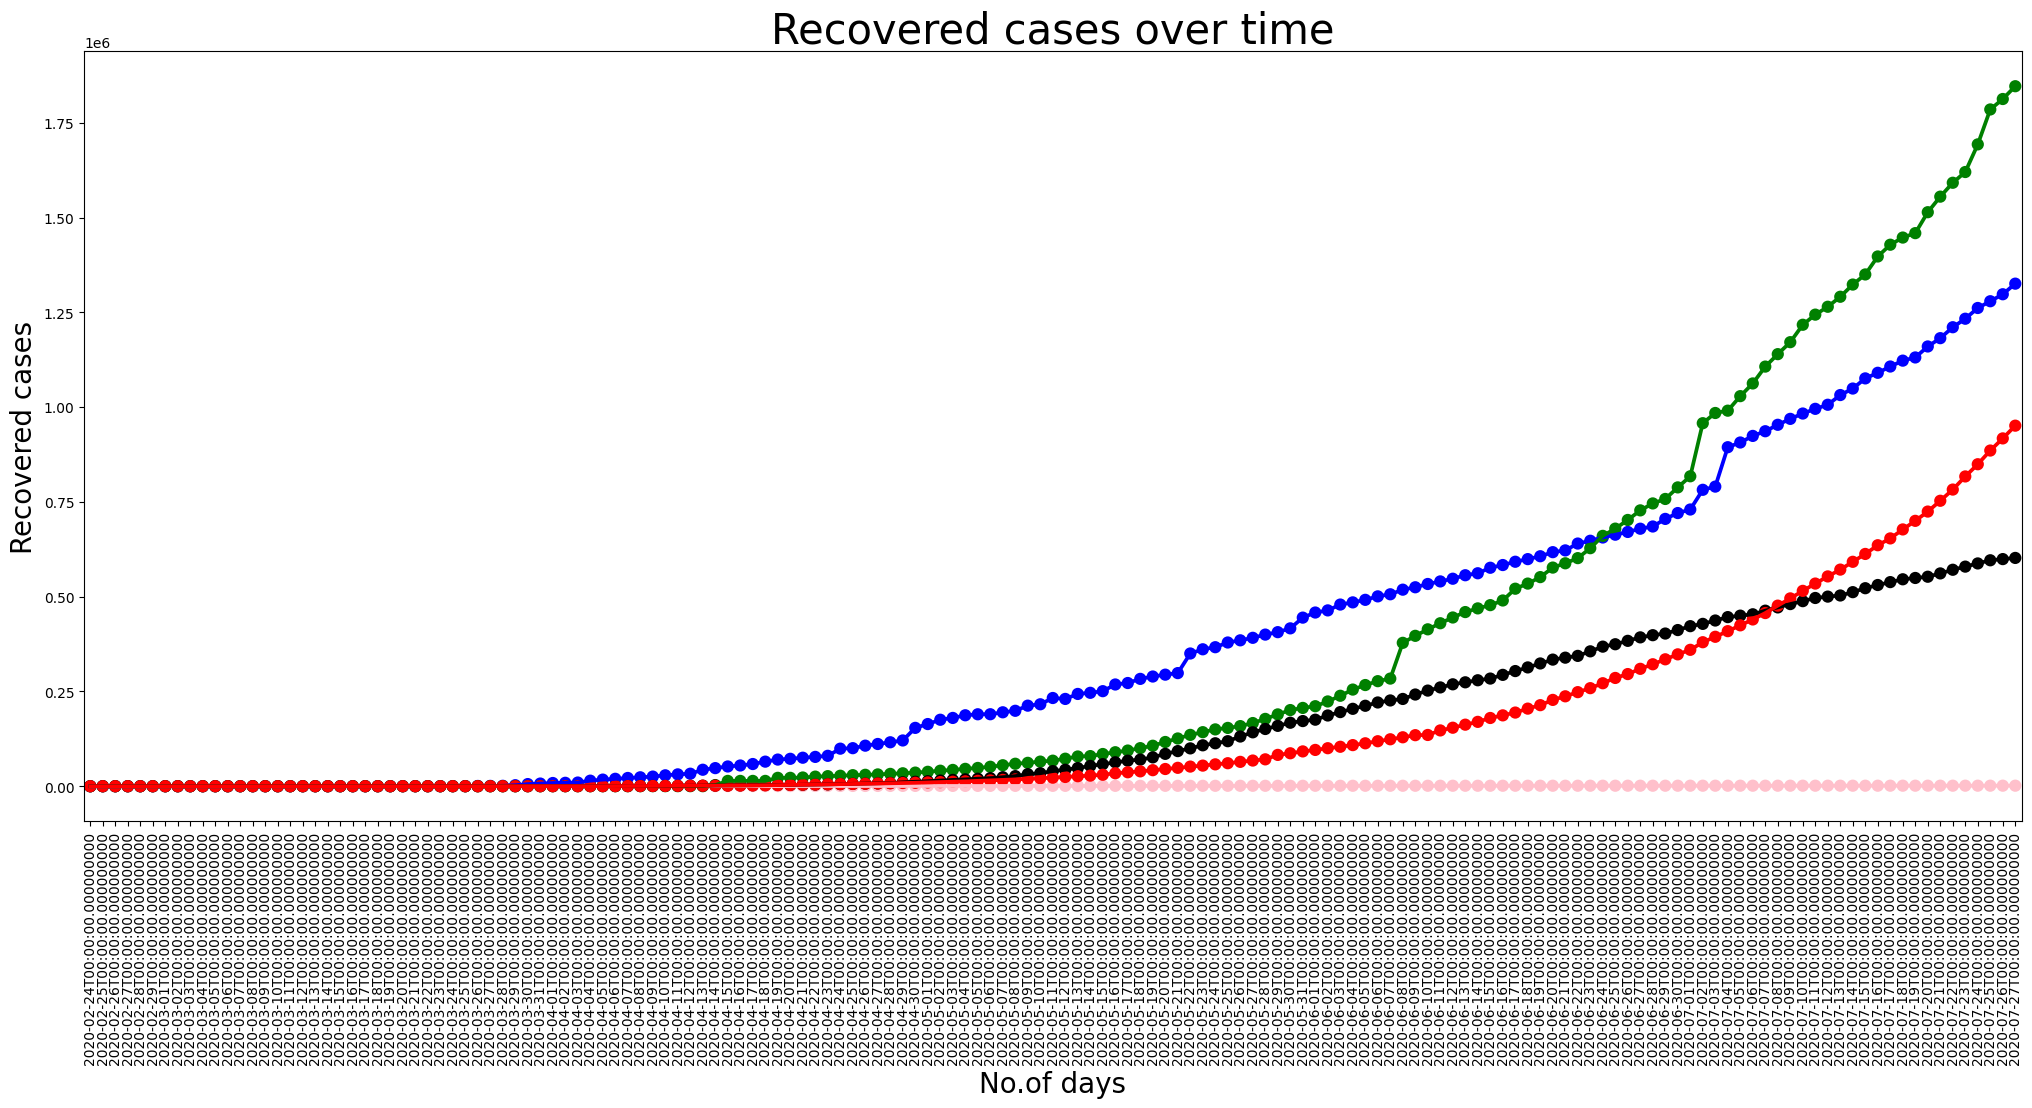

In [320]:
plt.figure(figsize=(25,10))
sns.pointplot(x=US.Date,y=US.Recovered,color='Blue')
sns.pointplot(x=UK.Date,y=UK.Recovered,color='Pink')
sns.pointplot(x=Brazil.Date,y=Brazil.Recovered,color='Green')
sns.pointplot(x=Russia.Date,y=Russia.Recovered,color='Black')
sns.pointplot(x=India.Date,y=India.Recovered,color='Red')

plt.xlabel('No.of days', fontsize=20)
plt.ylabel('Recovered cases',fontsize=20)
plt.xticks(rotation=90)
plt.title('Recovered cases over time',fontsize=30)
plt.show()

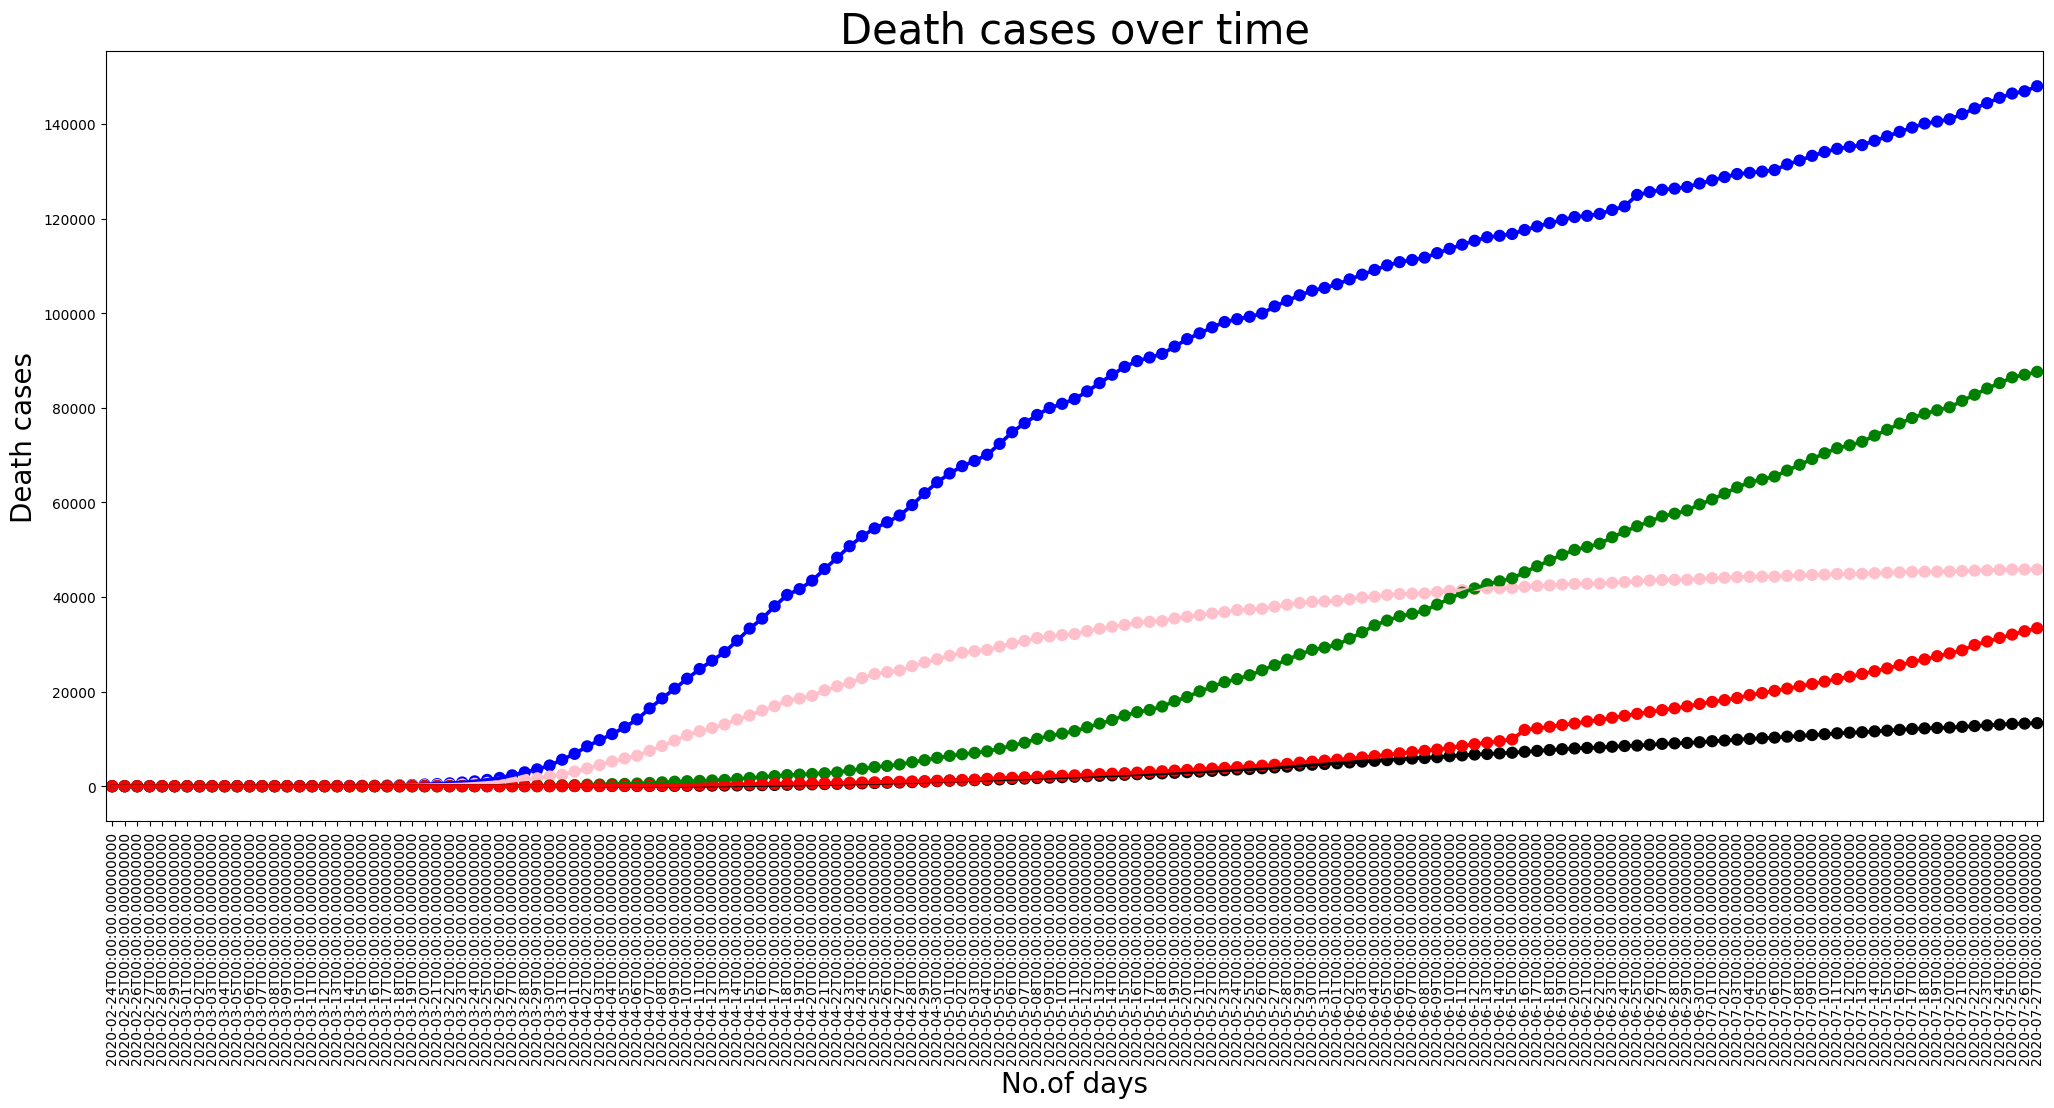

In [321]:
plt.figure(figsize=(25,10))
sns.pointplot(x=US.Date,y=US.Deaths,color='Blue')
sns.pointplot(x=UK.Date,y=UK.Deaths,color='Pink')
sns.pointplot(x=Brazil.Date,y=Brazil.Deaths,color='Green')
sns.pointplot(x=Russia.Date,y=Russia.Deaths,color='Black')
sns.pointplot(x=India.Date,y=India.Deaths,color='Red')

plt.xlabel('No.of days', fontsize=20)
plt.ylabel('Death cases',fontsize=20)
plt.xticks(rotation=90)
plt.title('Death cases over time',fontsize=30)
plt.show()

# Forecasting  phase

FB Prophet

In [180]:
!pip install prophet

In [181]:
from prophet import Prophet

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [220]:
confirmed=df.groupby('Date').sum()["Confirmed"].reset_index()
confirmed

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

# Forecasting for Confirmed Cases

In [221]:
confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)

In [222]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [322]:
con_model=Prophet(interval_width=0.95)

In [323]:
# Training of Model (fitting the data to the model)
con_model.fit(confirmed)

15:08:55 - cmdstanpy - INFO - Chain [1] start processing
15:08:55 - cmdstanpy - INFO - Chain [1] done processing


In [324]:
future=con_model.make_future_dataframe(periods=15)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11

[203 rows x 1 columns]

In [325]:
future.tail(20)

ds
183 2020-07-23
184 2020-07-24
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03
195 2020-08-04
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11

In [326]:
Forecast=con_model.predict(future)
Forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)


ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632401e+07  1.616211e+07  1.648456e+07
189 2020-07-29  1.653405e+07  1.636649e+07  1.669351e+07
190 2020-07-30  1.674820e+07  1.657586e+07  1.690294e+07
191 2020-07-31  1.696362e+07  1.679660e+07  1.712846e+07
192 2020-08-01  1.717143e+07  1.700981e+07  1.733409e+07
193 2020-08-02  1.736922e+07  1.718790e+07  1.754903e+07
194 2020-08-03  1.756410e+07  1.738522e+07  1.774710e+07
195 2020-08-04  1.775370e+07  1.756302e+07  1.795710e+07
196 2020-08-05  1.796374e+07  1.776967e+07  1.816120e+07
197 2020-08-06  1.817789e+07  1.796364e+07  1.840667e+07
198 2020-08-07  1.839331e+07  1.814394e+07  1.863391e+07
199 2020-08-08  1.860112e+07  1.831514e+07  1.886525e+07
200 2020-08-09  1.879891e+07  1.851362e+07  1.907982e+07
201 2020-08-10  1.899379e+07  1.867444e+07  1.928433e+07
202 2020-08-11  1.918339e+07  1.885150e+07  1.952857e+07

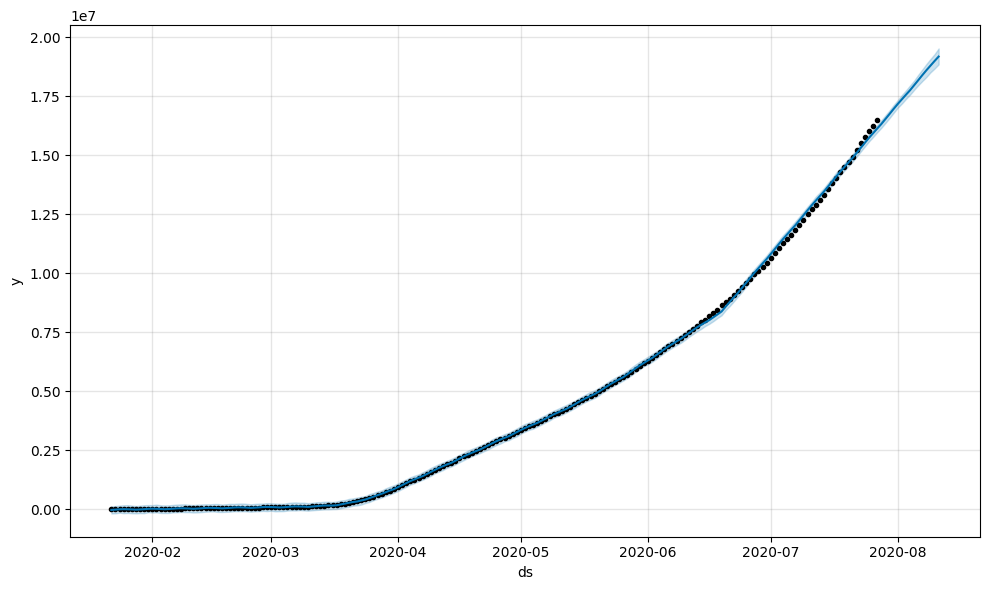

In [327]:
confirmed_plot=con_model.plot(Forecast)

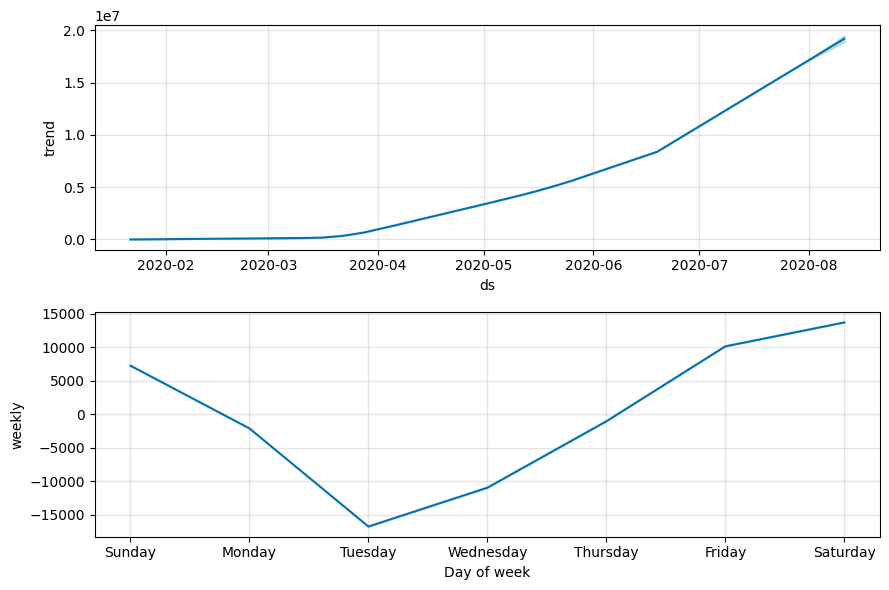

In [328]:
confirmed_forecast_plot1 = con_model.plot_components(Forecast)

# Forecasting for Recovered Cases

In [329]:
Recovered=df.groupby('Date').sum()["Recovered"].reset_index()
Recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [330]:
Recovered.rename(columns={'Date':'ds','Recovered':'y'},inplace=True)

In [331]:
Recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [332]:
con_model=Prophet(interval_width=0.95)

In [333]:
# Training of Model (fitting the data to the model)
con_model.fit(Recovered)

15:09:01 - cmdstanpy - INFO - Chain [1] start processing
15:09:01 - cmdstanpy - INFO - Chain [1] done processing


In [334]:
future=con_model.make_future_dataframe(periods=15)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11

[203 rows x 1 columns]

In [335]:
Forecast=con_model.predict(future)
Forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.313528e+06  9.196181e+06  9.433068e+06
189 2020-07-29  9.455717e+06  9.341757e+06  9.578787e+06
190 2020-07-30  9.598531e+06  9.480781e+06  9.707148e+06
191 2020-07-31  9.740095e+06  9.617245e+06  9.858737e+06
192 2020-08-01  9.880394e+06  9.758578e+06  1.000613e+07
193 2020-08-02  1.000646e+07  9.880190e+06  1.013095e+07
194 2020-08-03  1.014305e+07  1.000695e+07  1.028120e+07
195 2020-08-04  1.027046e+07  1.012917e+07  1.040577e+07
196 2020-08-05  1.041265e+07  1.026852e+07  1.056376e+07
197 2020-08-06  1.055547e+07  1.039149e+07  1.071047e+07
198 2020-08-07  1.069703e+07  1.052021e+07  1.086197e+07
199 2020-08-08  1.083733e+07  1.066763e+07  1.101887e+07
200 2020-08-09  1.096340e+07  1.077584e+07  1.117854e+07
201 2020-08-10  1.109998e+07  1.091011e+07  1.131869e+07
202 2020-08-11  1.122740e+07  1.099401e+07  1.145752e+07

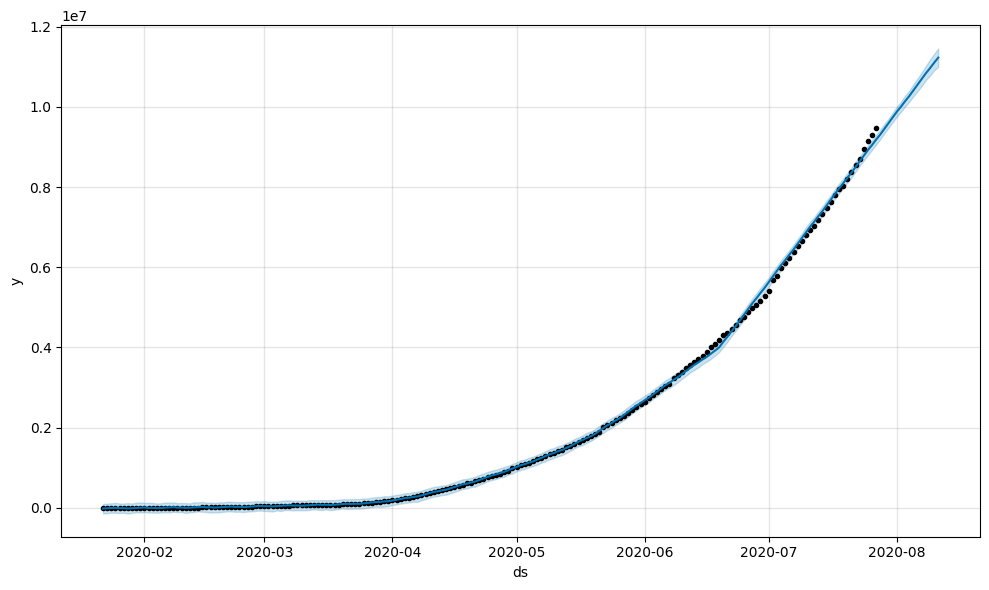

In [336]:
confirmed_plot=con_model.plot(Forecast)

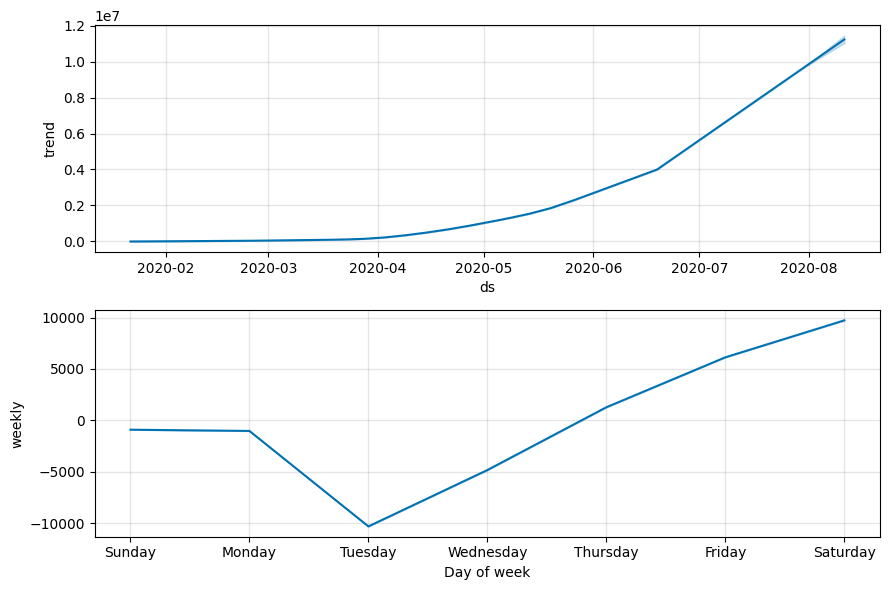

In [337]:
confirmed_forecast_plot1 = con_model.plot_components(Forecast)

# Forecasting for Avtive Cases

In [338]:
Active=df.groupby('Date').sum()["Active"].reset_index()
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [339]:
Active.rename(columns={'Date':'ds','Active':'y'},inplace=True)

In [340]:
Active

ds        y
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [341]:
con_model=Prophet(interval_width=0.95)

In [342]:
# Training of Model (fitting the data to the model)
con_model.fit(Active)

15:09:05 - cmdstanpy - INFO - Chain [1] start processing
15:09:05 - cmdstanpy - INFO - Chain [1] done processing


In [343]:
future=con_model.make_future_dataframe(periods=15)
future 

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11

[203 rows x 1 columns]

In [344]:
Forecast=con_model.predict(future)
Forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  6.353204e+06  6.283154e+06  6.425202e+06
189 2020-07-29  6.415552e+06  6.338584e+06  6.482559e+06
190 2020-07-30  6.481007e+06  6.412237e+06  6.552010e+06
191 2020-07-31  6.549045e+06  6.478017e+06  6.624287e+06
192 2020-08-01  6.611208e+06  6.539764e+06  6.680944e+06
193 2020-08-02  6.678514e+06  6.605301e+06  6.749308e+06
194 2020-08-03  6.732249e+06  6.655966e+06  6.813347e+06
195 2020-08-04  6.788974e+06  6.694978e+06  6.875827e+06
196 2020-08-05  6.851321e+06  6.761122e+06  6.945876e+06
197 2020-08-06  6.916776e+06  6.819900e+06  7.022378e+06
198 2020-08-07  6.984814e+06  6.874049e+06  7.098663e+06
199 2020-08-08  7.046977e+06  6.921909e+06  7.167815e+06
200 2020-08-09  7.114283e+06  6.990809e+06  7.246942e+06
201 2020-08-10  7.168019e+06  7.024926e+06  7.315652e+06
202 2020-08-11  7.224744e+06  7.077893e+06  7.375612e+06

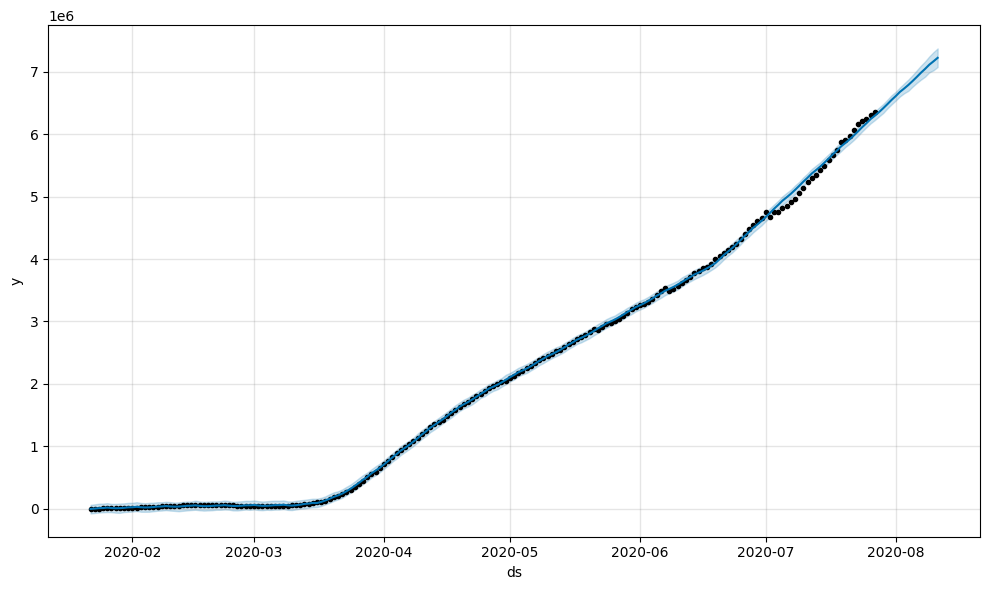

In [345]:
Active_plot=con_model.plot(Forecast)

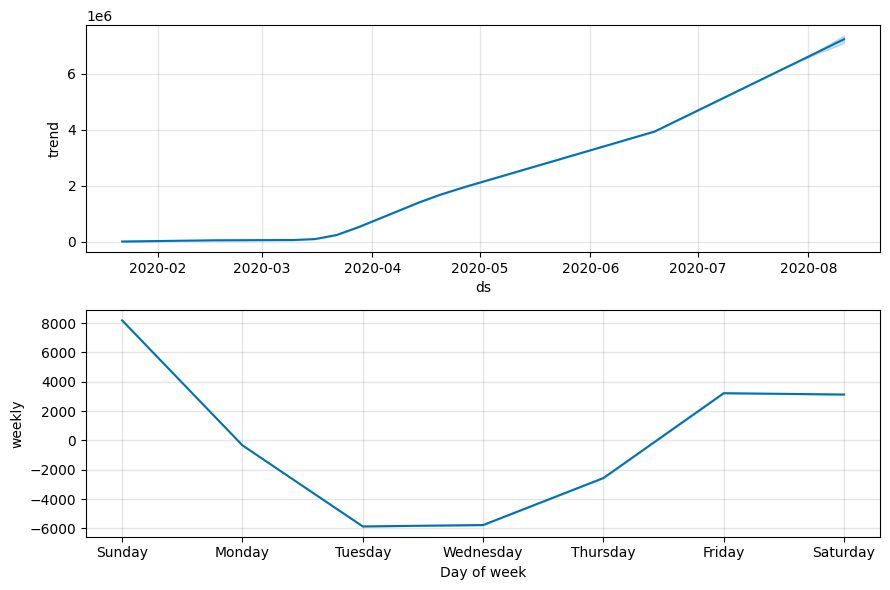

In [346]:
Active_forecast_plot1 = con_model.plot_components(Forecast)

# Forecasting for Death Cases

In [347]:
Death=df.groupby('Date').sum()["Deaths"].reset_index()
Death

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [348]:
Death.rename(columns={'Date':'ds','Deaths':'y'},inplace=True)

In [349]:
Death

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [350]:
con_model=Prophet(interval_width=0.95)

In [351]:
# Training of Model (fitting the data to the model)
con_model.fit(Death)

15:09:09 - cmdstanpy - INFO - Chain [1] start processing
15:09:09 - cmdstanpy - INFO - Chain [1] done processing


In [352]:
future=con_model.make_future_dataframe(periods=15)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11

[203 rows x 1 columns]

In [353]:
Forecast=con_model.predict(future)
Forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)

ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  652342.857217  649091.699778  655582.357401
189 2020-07-29  657910.776693  655027.081645  661041.900342
190 2020-07-30  663521.743356  660401.582087  666590.559924
191 2020-07-31  669038.962960  665441.550458  672481.592934
192 2020-08-01  673922.465056  669500.914461  677865.065959
193 2020-08-02  678060.469456  672320.520827  682368.924542
194 2020-08-03  682351.854619  676121.120093  687596.565452
195 2020-08-04  687559.891672  680346.632034  693973.649807
196 2020-08-05  693127.811149  684965.765225  700606.906254
197 2020-08-06  698738.777811  687964.750756  706425.079403
198 2020-08-07  704255.997415  693036.089342  713663.711512
199 2020-08-08  709139.499512  696848.024775  719657.095841
200 2020-08-09  713277.503912  699858.818772  725312.533940
201 2020-08-10  717568.889074  702586.137891  730894.988766
202 2020-08-11  722776.926127  705104.359426  739011.700617

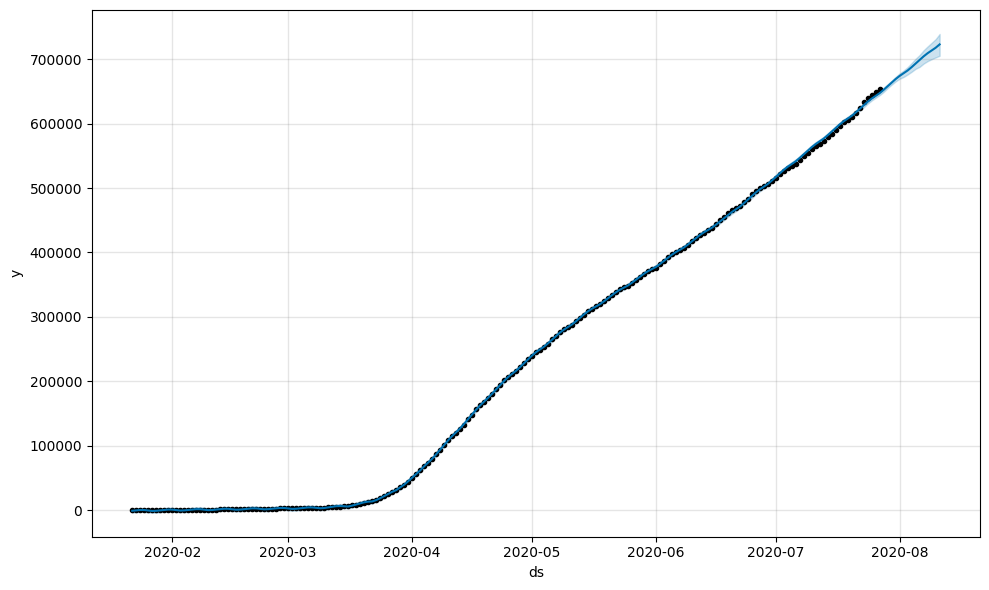

In [354]:
Death_plot=con_model.plot(Forecast)

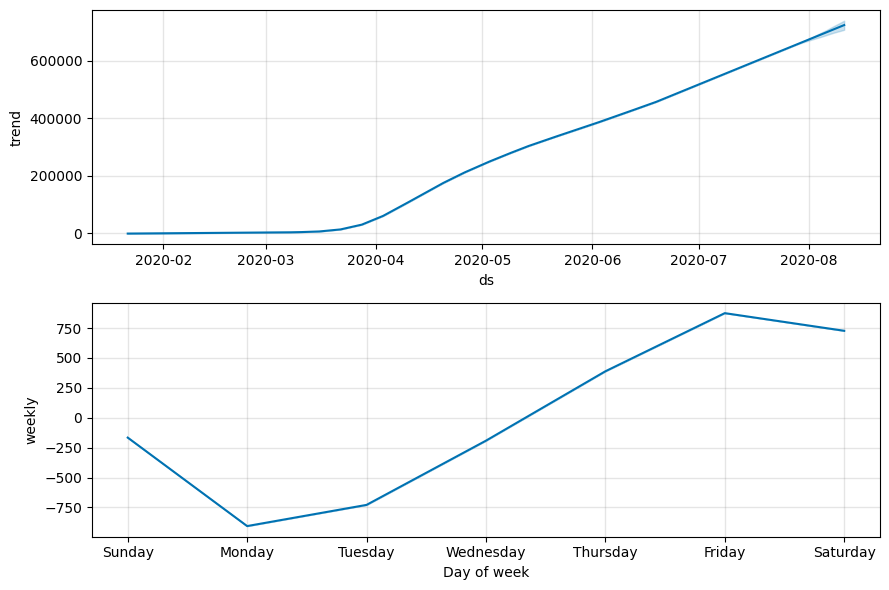

In [355]:
Death_forecast_plot1 = con_model.plot_components(Forecast)